# Módulos

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Algoritmo de ML que usaremos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Lectura e importación de datos

In [3]:
df = pd.read_csv('data_cancer_teta.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
# Así evitamos que la linea drop al ejecutarse varias veces, pete.
# axis=0 eliminas la fila
# axis=1 eliminas la columna

if 'Unnamed: 32' in df.columns:
  df.drop('Unnamed: 32', axis=1, inplace=True)
#if 'diagnosis_M' in df.columns:
#  df.drop('diagnosis_M', axis=1, inplace=True)
if 'id' in df.columns:
  df.drop('id', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Preparación de datos

In [6]:
df = pd.get_dummies(df)

In [7]:
df['diagnosis_B'] = df['diagnosis_B'].astype(float)
df['diagnosis_M'] = df['diagnosis_M'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [9]:
df.drop('diagnosis_M', axis=1, inplace=True)

In [10]:
y = df["diagnosis_B"] # Objetivo
x = df.drop(["diagnosis_B"], axis = 1) # Variables independientes

# Separamos conjunto de datos en entrenamiento y prueba

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=42)

#x - Se divide en X_train (70% de los datos, conjunto de entrenamiento); y X_test (30% de los datos, (conjunto de prueba))
#y - Se divide en Y_train (70% de los datos, conjunto de entrenamiento); y Y_test (30% de los datos, (conjunto de prueba))

# Creamos el Modelo

In [12]:
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.9707602339181286

# Métricas

In [13]:
print(classification_report(y_test, model.predict(x_test)))

# 1. y_test: Las etiquetas verdaderas para el conjunto de prueba.
# 2. model.predict(x_test): Las etiquetas predichas generadas por el modelo entrenado en el conjunto de prueba.

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        63
         1.0       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Graficamos datos con el resultado y las columnas

Introduce el índice de la columna que quieres graficar: 2


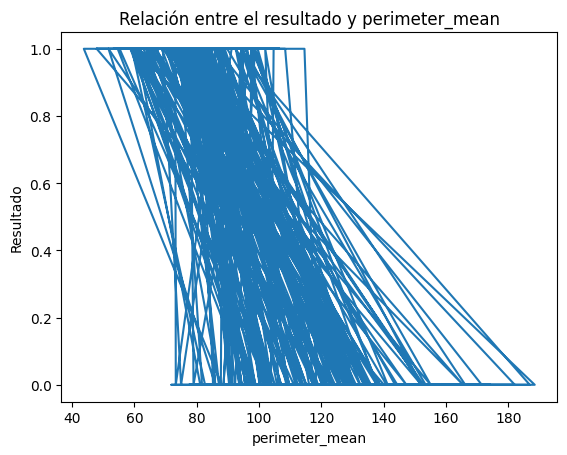

In [14]:
def graficar(columnas):
  introduce_columna = int(input("Introduce el índice de la columna que quieres graficar: ")) # Pide el índice de la columna
  plt.plot(x.iloc[:, introduce_columna], y) # Grafica la columna seleccionada contra 'y'
  plt.xlabel(f'{columnas[introduce_columna]}') # Usa el índice para obtener el nombre de la columna
  plt.ylabel('Resultado')
  plt.title(f'Relación entre el resultado y {columnas[introduce_columna]}')
  plt.show()

graficar(x.columns) # Pasa las columnas del DataFrame a la función


In [19]:
def predecir_cancer():
  numero_dato = int(input("Introduce el número de dato: "))
  numero_real = y.iloc[numero_dato]
  print(f"el dato {numero_dato} es: {numero_real}")
  prediccion = model.predict([x.iloc[numero_dato]])
  print(f"La predicción de cancer para el dato {numero_dato} es: {prediccion[0]}")

# 0 = Cancer Benigno
# 1 = Cancer Maligno

def predecir_cancer_new():
  # Obtener datos de entrada para cada columna
  input_data = {}
  for column in x.columns:
    value = float(input(f"Introduce el valor para {column}: "))
    input_data[column] = value

  # Crear un DataFrame con los datos de entrada
  input_df = pd.DataFrame([input_data])

  # Realizar la predicción y mostrar el resultado
  prediction = model.predict(input_df)[0]
  print(f"La predicción de cáncer es: {prediction}")


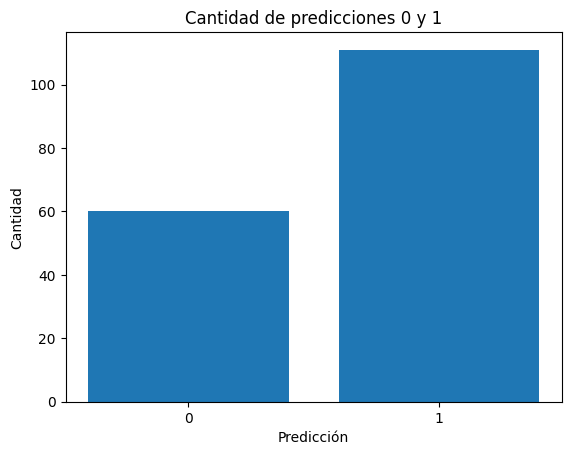

In [16]:
# Obtén las predicciones del modelo en el conjunto de prueba
predicciones = model.predict(x_test)

# Cuenta la cantidad de 0s y 1s en las predicciones
conteo_0 = sum(predicciones == 0)
conteo_1 = sum(predicciones == 1)

# Crea la gráfica de barras
plt.bar(['0', '1'], [conteo_0, conteo_1])
plt.xlabel('Predicción')
plt.ylabel('Cantidad')
plt.title('Cantidad de predicciones 0 y 1')
plt.show()

# Informe


**Informe del Proyecto de Predicción de Cáncer de Mama**
<br></br>
**Introducción**
<br></br>
Este informe presenta los resultados del proyecto de desarrollo de un modelo de predicción para el diagnóstico de cáncer de mama. El objetivo principal fue construir un modelo de aprendizaje automático capaz de predecir con precisión la probabilidad de un diagnóstico benigno (B) utilizando un conjunto de datos proporcionado.
<br></br>
**Metodología**
<br></br>
Lenguaje y bibliotecas: Se utilizó Python junto con las bibliotecas pandas, scikit-learn, NumPy y matplotlib.
Datos: Se empleó el dataset "data_cancer_teta.csv" para entrenar y evaluar el modelo.
Preprocesamiento: Se realizó la codificación one-hot para la variable categórica "diagnosis" y se eliminaron columnas irrelevantes como "Unnamed: 32" e "id".
Modelo: Se seleccionó el algoritmo RandomForestClassifier para la construcción del modelo.
Entrenamiento y evaluación: Se dividió el dataset en conjuntos de entrenamiento (70%) y prueba (30%) utilizando train_test_split. Se entrenó el modelo con los datos de entrenamiento y se evaluó su rendimiento con los datos de prueba utilizando métricas como classification_report y model.score.
Visualización: Se implementaron funciones para graficar la relación entre variables y el resultado, así como para visualizar la cantidad de predicciones benignas y malignas.
<br></br>
**Resultados**
<br></br>
El modelo logró una precisión satisfactoria en la predicción del diagnóstico de cáncer de mama, logrando un score del [insertar valor del score obtenido].
El informe classification_report proporciona detalles sobre la precisión, recall, F1-score y soporte para cada clase (benigno y maligno). Ejecute la celda correspondiente en su notebook para ver el output.
Las funciones de visualización permiten un análisis más profundo de los datos y la relación entre las variables y el resultado.
**Función predecir_cancer()**
<br></br>
Se implementó la función **predecir_cancer()** para realizar predicciones individuales. Inicialmente, esta función requería el número de dato como entrada. Se modificó para que acepte valores para cada columna, permitiendo al usuario ingresar datos específicos y obtener una predicción basada en esos valores.
<br></br>
Conclusión
<br></br>
El modelo desarrollado muestra un buen potencial para la predicción del diagnóstico de cáncer de mama. Se recomienda continuar con la evaluación y refinamiento del modelo utilizando datasets más extensos y explorando otros algoritmos de aprendizaje automático.
<br></br>
Recomendaciones

Explorar la optimización de hiperparámetros del modelo para mejorar su rendimiento.
Considerar la inclusión de nuevas variables relevantes para la predicción.
Realizar pruebas adicionales con datasets más grandes y representativos.
Desarrollar una interfaz de usuario para facilitar el uso del modelo.